## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

---

## 任务0. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [29]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
import itchat
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


In [ ]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.


---
**注意：如果您的账号为2018年新注册的账号，或者您倾向于使用假数据来完成此项目，可以将下方代码块中的变量`use_fake_dataset`设置为`True`。并且，您无需完成任务0中的练习和问题，可以直接从任务1开始。**

In [15]:
### 以下内容无需改动，直接运行即可
# 读取数据
use_fake_dataset = False
if not use_fake_dataset:
    dataset = itchat.get_friends(update=True)[0:]
else:
    dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')


---

### 练习：打个招呼吧

在这个章节中，我们将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

你需要完成以下内容：
 - 将想要发送的信息内容赋值给`message`

In [16]:
### TODO：将信息内容赋值给message
message = "Hello"

In [17]:
### 以下内容无需改动，直接运行即可
# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '5464667448847703830', 'LocalID': '15505822529433'}>

打开手机微信端的文件传输助手，看看是否收到了这条信息，并回答以下问题。

### **问题1**
message 的变量类型是什么？

**回答**：（string）

In [18]:
### 退出登陆
itchat.logout()

LOG OUT!


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [19]:
### 以下内容无需改动，直接运行即可
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} 
            for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

### 练习：打印数据
* 打印`pre_data`的数据类型
* 打印`pre_data`中的第0条数据，以及其数据类型。
* 打印`pre_data`中第0条数据的微信昵称

---
### 提示：
* `print()`函数可以打印括号内的内容。

* `type()`函数可以提取括号内变量的数据类型。

#### 对于列表的索引

> 如果有一个列表`lst`,我想提取它的第三条数据（注意第三条数据和索引2是对应的）：
```python
lst = [1,2,3,4,5]
print(lst[2])
```
输出
```python
3
```

#### 对于字典的索引

> 如果有一个字典`color`,我想根据它的某一个键（key）提取对应值（value）：
```python
color = {'apple':'red','pear':'green','banana':'yellow'}
#这是一个水果对应颜色的字典
#我想获取‘pear’的颜色
print(color['pear'])
```
输出
```python
green
```

---

In [20]:
### TODO：打印pre_data的数据类型
print(type(pre_data))

<class 'list'>


In [28]:
### TODO：打印第一条数据及数据类型
print(pre_data[0])
print(type(pre_data[0]))

{'NickName': '周丰毅', 'Sex': 1, 'Province': '北京', 'City': '海淀', 'Signature': ':_:'}
<class 'dict'>


In [10]:
### TODO：打印第0条数据的微信昵称
print(pre_data[0]["NickName"])

周丰毅


### **问题2**
pre_data的数据类型是什么？pre_data中第0条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：（list,dict）

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

---
### 提示：
- `dataset`中1表示男性、2表示女性，如果不是1也不是2，那就是unknown啦；
- 虽然我们这里没有要求，但是实际的名单中，索引为`0`的实际是自己；
- 本道题目需要使用`for`循环

#### `for`循环示例
> 我们首先定义一个城市名称的`list`，然后通过`for`循环来输出每一个城市的名称
```python
cities = ['new york city', 'mountain view', 'chicago', 'los angeles']
for city in cities:
    print(city)
```
输出
```python
new york city
mountain view
chicago
los angeles
```

#### `if..elif..else`条件语句示例

> 下面是循环语句中嵌套条件语句的示例。在此示例中，我们需要判断`num_list`中的数字与3和7的大小关系。
```python
num_list = [1,5,10]
for num in num_list:
    if num < 3:
        print(num,'这个数字小于3')
    elif 7>=num>=3:
        print(num,'这个数字大于等于3，小于等于7')
    else:
        print(num,'这个数字大于7')
```
输出
```python
1 这个数字小于3
5 这个数字大于等于3，小于等于7
10 这个数字大于7
```

---

In [11]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}

for friend in dataset[1:]:
    if(friend['Sex'] == 1):
        sex['male'] += 1
    elif (friend['Sex'] == 2):
        sex['female'] += 1
    else:
        sex['unknown'] += 1

In [12]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 318 位男性、 317 位女性，有 31 位好友未填写。


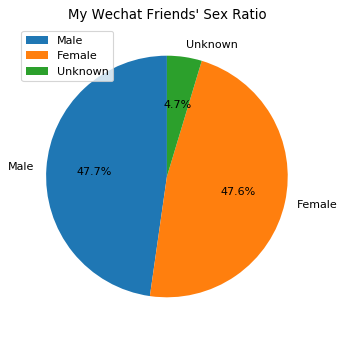

In [13]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**

---
### 提示：
* 可以用`for`循环实现，具体的`for`循环我们已经在上一节实现过了哦，相信聪明的你可以再一次做到的！
* 这里要去除的空字符串，指的是好友省份信息中为空的那些，**空字符串是`''`**

#### `append()`方法应用示例：
>```python
lst = ['a','b','c']
lst.append('d')
print(lst)
```
输出
```python 
['a','b','c','d']
```

---

In [14]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []
for friend in dataset[1:]:
    if friend['Province']:
        province.append(friend['Province'])

In [15]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

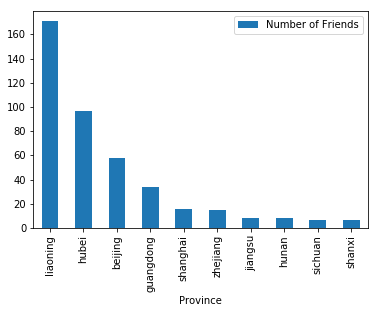

In [16]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出第2条签名

---
### 提示：
* 列表的索引我们在前面已经实现过了哦，不记得了可以再去看看
* **注意**：索引的2和实际的第2条是有区别的，Python的索引是从0开始的。

---

In [4]:
### TODO：打印出第2条签名
print(pre_data[2]['Signature'])

NameError: name 'pre_data' is not defined

In [18]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.862 seconds.
Prefix dict has been built succesfully.


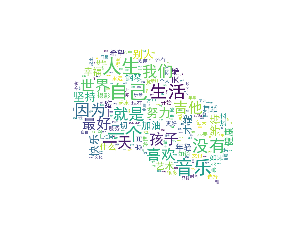

In [26]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

---
### 知识小贴士
同学，理解情感分析其实很简单哦！

自然语言处理的很多任务也会应用到机器学习的方法。

我们首先会将问题定位，情感分析到底是一个分类（预测已知情感的类型）还是回归（预测情感强弱的程度），还是聚类（通过算法自动得出情感类型）。

以我们作业中的情感分析为例，这里是一个回归问题，也就是说我们预测的是一个连续的数值，这个数值的强弱决定了情感的强弱。

如果我们把整个情感分析的接口看一个工厂，那么我们输入的文本就是原材料，输出的成品就是情感的强弱度，那么当然机器学习的算法就扮演了加工的角色啦（虽然事实上会复杂很多，不过在初期我们可以简单地这么理解）。

因此，采用什么样的手段来加工我们输入的文本，就能决定最终我们得出的强弱度的精确程度。

算法层面能处理文本的方式上有很多，例如传统的TF-IDF啦，最大熵模型啦，以及我想大家都很感兴趣的深度学习的等还有很多，感兴趣的话可以对自然语言处理做一些功课，能够有更深的认识。

情感分析的应用也很多，我来举两个栗子：
* 通过情感分析，对金融领域用户生成的文本分析，可以起到对金融市场的监控和股价异常处理的重要作用；
* 我们常常会在电商网站上留下点评，通过这些文本的情感分析，能够更好地理解用户对商品的喜好，进而制定营销策略。

总而言之，情感分析能够很好地帮助理解用户的喜好，根据不同喜好来做出更好的决定哦，对于市场研究来说，是一个很有利的工具。

---

In [21]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

---
### 提示：
* 本题可以用`for`循环语句和对应的`if`条件语句实现，我们在前面给出过例子，可以返回查看。

---

In [23]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [24]:
### TODO：统计sentiments中大于0.66的个数
positive = sum([1 if i>0.66 else 0 for i in sentiments])

### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = sum([1 if 0.66>=i>=0.33 else 0 for i in sentiments])

### TODO：统计sentiments中小于0.33的个数
negative = sum([1 if i<0.33 else 0 for i in sentiments])

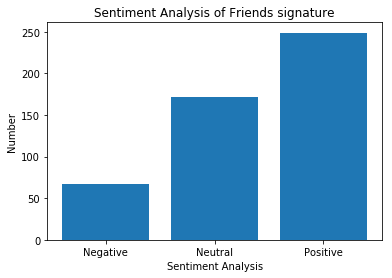

In [25]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**